In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from wordcloud import WordCloud


In [37]:
#Leyendo el df para realizar el sistema de recomendación
df = pd.read_csv('df_final_movies_.csv')

In [38]:
#Visualizando estadisticasdescriptivas de los datos con los que cuenta actualmente el dataframe
df.describe(include="all")

,Unnamed: 0,id,title,name_belongs,overview,genres,original_language,spoken_languages,popularity,release_date,...,production_countries,runtime,status,tagline,vote_average,vote_count,budget,revenue,return,name
count,45376.000000,45376.000000,45376,4488,44435,45376,45365,45376,45376.000000,45376,...,45376,45130.000000,45296,20398,45376.000000,45376.000000,4.537600e+04,4.537600e+04,4.537600e+04,44540
unique,NaN,NaN,42196,1695,44232,4065,89,1931,NaN,17333,...,2389,NaN,6,20269,NaN,NaN,NaN,NaN,NaN,18861
top,NaN,NaN,Cinderella,The Bowery Boys,No overview found.,[' Drama'],en,['en'],NaN,2008-01-01,...,[' US'],NaN,Released,Based on a true story.,NaN,NaN,NaN,NaN,NaN,['John Ford']
freq,NaN,NaN,11,29,133,4998,32202,22380,NaN,136,...,17846,NaN,44936,7,NaN,NaN,NaN,NaN,NaN,63
mean,22687.500000,108027.103094,NaN,NaN,NaN,NaN,NaN,NaN,2.926458,NaN,...,NaN,94.181675,NaN,NaN,5.624070,110.096439,4.232604e+06,1.123010e+07,6.600428e+02,NaN
std,13099.067244,112168.377996,NaN,NaN,NaN,NaN,NaN,NaN,6.009672,NaN,...,NaN,38.341059,NaN,NaN,1.915423,491.742894,1.743986e+07,6.438996e+07,7.469329e+04,NaN
min,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,11343.750000,26385.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.388840,NaN,...,NaN,85.000000,NaN,NaN,5.000000,3.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
50%,22687.500000,59857.500000,NaN,NaN,NaN,NaN,NaN,NaN,1.130454,NaN,...,NaN,95.000000,NaN,NaN,6.000000,10.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
75%,34031.250000,156533.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.691695,NaN,...,NaN,107.000000,NaN,NaN,6.800000,34.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN


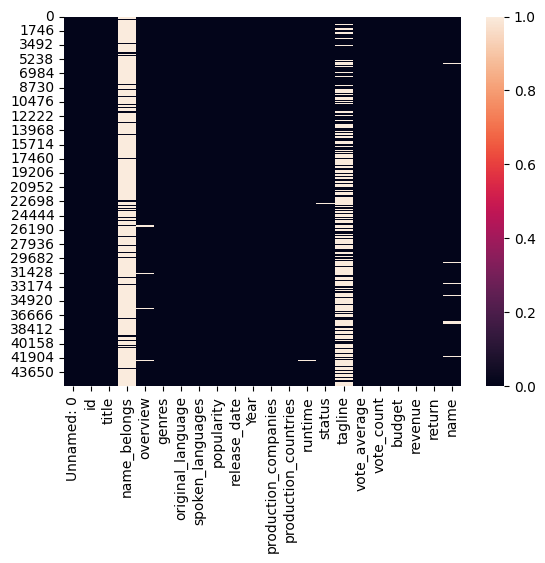

In [39]:
# Viendo de forma gràfica las variables que tienen valores nulos
sns.heatmap(df.isnull()) 
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_2424\577922766.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlac = df.corr()


<Axes: >

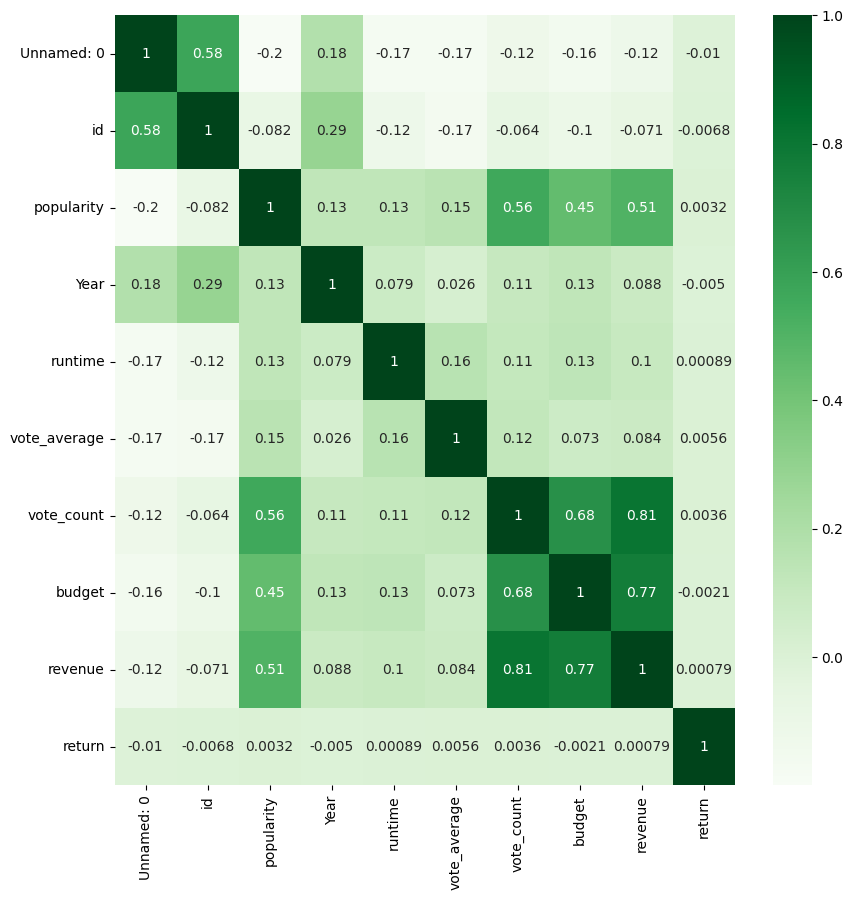

In [17]:
#visualizando la correlaciòn de las variables númericas del df
correlac = df.corr()
plt.figure(figsize=[10,10])
sns.heatmap(correlac, annot=True, cmap='Greens')

Se observa que popularuity se encuentra rlacionada de forma positiva con vote count, bdget, revenue. Y que estas entre sí tienen una fuerte relación. Las películas que han tenido mayores ingresos han tenido más votos por parte de los usuarios.

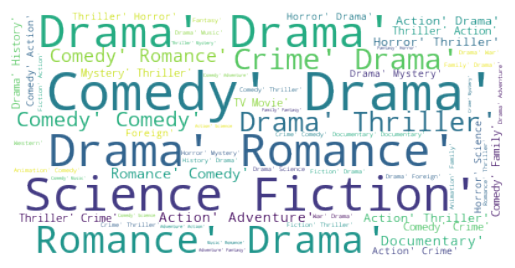

In [18]:
# Creando nube de palabras con la variable genres, siendo esta de tipo cualitativa
texto_title = ''
for i in df['genres']:
    texto_title += i + ' ' 

mapa_palabras = WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(texto_title)
plt.imshow(mapa_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

<mark>"Sistema de recomendación"

Teniendo en cuenta que tanto para la variable tagline y name_belongs que nos permiten describir o caracterizar las peliculas cuentas con una gran cantidad de valores nulos, se tomarà en cuenta la columna "genres" para le desarrollo del sistema de recomendación de peliculas.

In [19]:
# definiendo el tamaño del dataframe a usar, ya que por capacidad el equipo a usar
#se debe limitar
df = df.loc[0:4000,['title','genres']]

In [20]:
#Haciendo uso de la libreria sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
#Instanciando la funciín Tf y idf Vector, con palabras a omitir en ingles
tfidf = TfidfVectorizer(stop_words='english')

In [21]:
# sustituir los nulos con valores vacìos para evitar problemas al usarl la funciòn
df['genres'] = df['genres'].fillna('')
df['genres']

0                 [' Animation', '  Comedy', '  Family']
1                [' Adventure', '  Fantasy', '  Family']
2                               [' Romance', '  Comedy']
3                    [' Comedy', '  Drama', '  Romance']
4                                            [' Comedy']
                              ...                       
3996                  [' Drama', '  Crime', '  Romance']
3997                            [' Comedy', '  Fantasy']
3998                             [' Horror', '  Comedy']
3999    [' Fantasy', '  Drama', '  Comedy', '  Romance']
4000                            [' Comedy', '  Fantasy']
Name: genres, Length: 4001, dtype: object

In [22]:
#Transformando los datos a tomar en cuenta para basar el sistema de recomendación
tfidf_matrix = tfidf.fit_transform(df['genres'])
#Dimensiòn de la matriz
tfidf_matrix.shape

(4001, 22)

In [23]:
#empleando la funcion linear_kernel para establecer la comparativa entre los vectores
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
#Definiendo los indices para la etiqueta, eliminando los duplicados
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [25]:
#Estableciendo la función que devolverá las peliculas a recomendar
def recomendation(title, cosine_sim=cosine_sim):
    idx = indices[title]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:6]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [28]:
#Probando la función
recomendation('Toy Story 2')

695              Oliver & Company
726                 A Close Shave
1108           The Wrong Trousers
1716             Meet the Deedles
1937    The Great Mouse Detective
Name: title, dtype: object